## Qiskit textbook, volume 1
### O funcionamento de computadores clássicos

In [11]:
# Célula de importações
import matplotlib
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

### Dividindo informações em bits

In [12]:
#Primeiro exercício, retorna o binário de um número
def exercicio_01(n):
    return f'{n:04b}'
binsd = exercicio_01(72)
print(f"72 em binário seria {binsd}")

# Segundo exercício, apenas responde uma pergunta
def exercício_02(a):
    pergunta = "Se você tem um número N de bits, em quantos estados diferentes podemos representa-los?"
    print(pergunta)
    print(f"Resposta: {a}")
exercício_02("Levando em conta que cada bit contém 2 estados de informação, 2^n")

72 em binário seria 1001000
Se você tem um número N de bits, em quantos estados diferentes podemos representa-los?
Resposta: Levando em conta que cada bit contém 2 estados de informação, 2^n


### Criando um circuito quântico

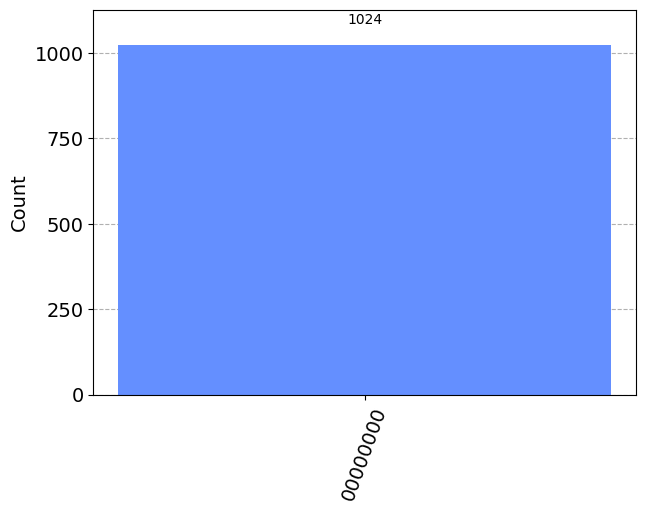

In [13]:
qc_out = QuantumCircuit(8) # Cria um circuito com 8 bits quânticos
qc_out.measure_all() # Faz a medição do circuito, criando 8 bits de saída

def simular_circuito(qc):
    simulador = Aer.get_backend('aer_simulator') # Backend de simulação
    resultado = simulador.run(qc).result()
    counter = resultado.get_counts()
    return counter

plot_histogram(simular_circuito(qc_out))

### Introdução a portas lógicas
#### NOT gate

In [14]:
# A porta NOT é bastante simples, ela simplesmente inverte o valor de um bit NOT(0) = 1 && NOT(1) = 0
# Para Qubits, esta porta é conhecida como " x ", ou " pauli-x "

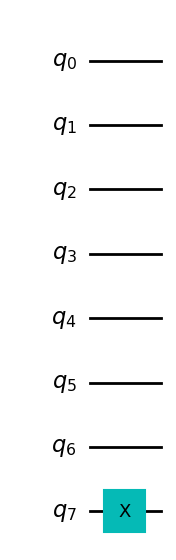

In [15]:
qc_encode = QuantumCircuit(8) # Cria um circuito de 8 bits
qc_encode.x(7) # Utiliza uma porta x no sétimo qubit do circuito (ou o oitavo, já que começamos a contar do 0)
qc_encode.draw(output="mpl") # Desenha o circuito na tela

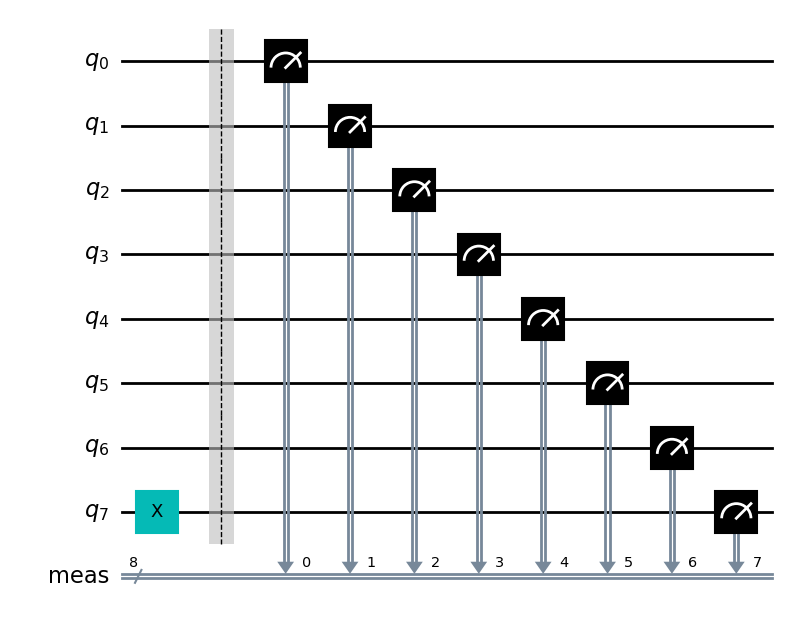

In [16]:
qc_encode.measure_all() # Realiza a medição de todos os qubits, da mesma maneira que fizemos no circuito anterior
qc_encode.draw(output="mpl") # Desenha o circuito na tela

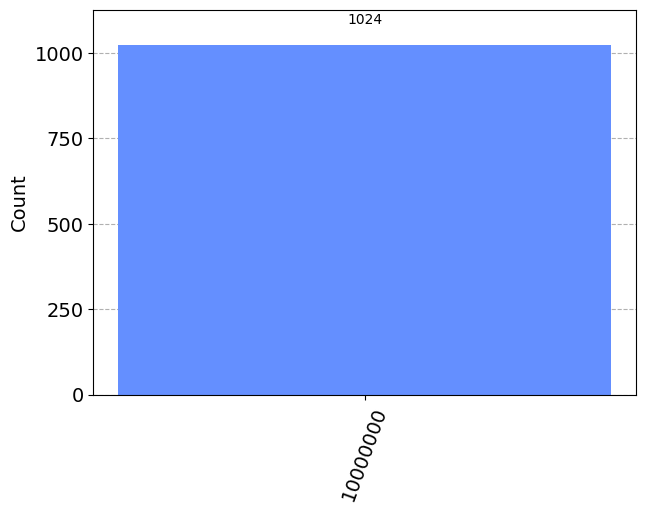

In [17]:
plot_histogram(simular_circuito(qc_encode))

Um detalhe importante de ser mencionado é o fato de que as strings de binário do qiskit devem ser lidas da direita para a esquerda, que nem na escrita hebraica. Então ao alterar apenas o sétimo bit da string, teremos "10000000" que pode ser convertido para 128, ou 2⁷, como visto anteriormente

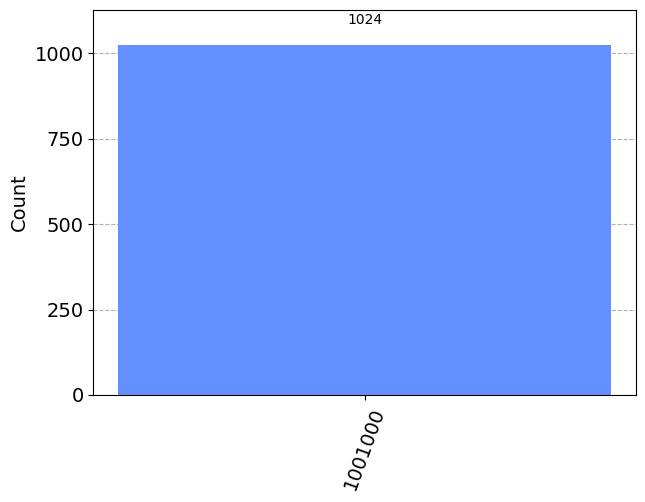

In [18]:
# Exercício, codificando um número aleatório com um circuito, utilizando o mesmo número do exercício 1, 72
def exercicio_03():
    qc = QuantumCircuit(7)
    qc.x(6)
    qc.x(3)
    qc.measure_all()
    y = simular_circuito(qc)
    return y
plot_histogram(exercicio_03()) 
# Um detalhe, ao usar a função "plot_histogram" dentro de outra função eu recebo um erro do matplotlib, então por isso que estou chamando essa função sempre sozinha   

### Adicionando binários
No início deste capítulo, a documentação ensina a somar binários na mão, o que é uma ação simples porém trabalhosa, perfeita para ser automatizada com um circuito

 Como sempre, esse circuito irá codificar um input X e entregar um output Y equivalente a soma que queremos<br>
 O primeiro passo para fazer um circuito de adição, é verificarmos se dois bits são iguais ou diferentes<br>
 Fazemos isso com uma XOR gate, que basicamente age deste jeito: <br>
 <br>
  XOR(0, 0) = 0 <br>
  XOR(0, 1) = 1 <br>
  XOR(1, 0) = 1 <br>
  XOR(1, 1) = 0 <br>
  <br>
A porta quântica responsável por este trabalho é a controlled-NOT (CNOT) gate (que eu fiquei devendo no mapa mental, perdão por isso)

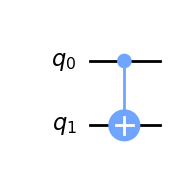

In [19]:
qc_cnot = QuantumCircuit(2) # Cria um circuito com 2 qubits
qc_cnot.cx(0,1) # Esta função é aplicada a 2 qubits, um de controle o outro sendo o alvo
qc_cnot.draw(output="mpl")

A função é aplicada com os 2 qubits de input, e seu output é registrado no qubit <i>Target</i> ou <i>Alvo</i> (que é o com o círculo marcado pelo X) 

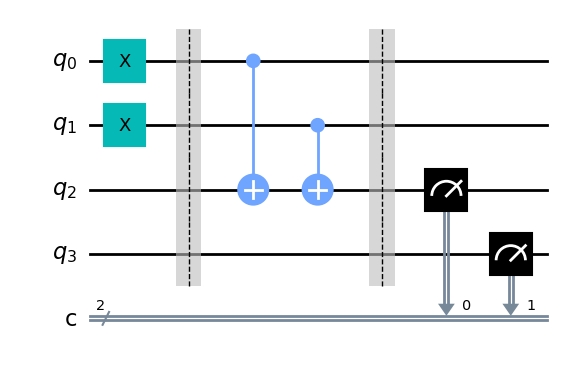

In [23]:
qc_ha = QuantumCircuit(4,2) # Cria um circuito quântico com 4 qubits e 2 bits clássicos
qc_ha.x(0) 
qc_ha.x(1) 
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extract outputsoutput="mpl"
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw(output="mpl")

#Neste circuito, já temos metade do circuito que queremos para somar dois binários
#
# Se q0 == 1 && q1 == 1: q2 = 1 && q3 = 0; (q2,q3) = (1, 0) 
# Agora, precisamos aplicar uma Toffoli gate, que é equivalente a AND gate
#
# Toffoli(1 , 1, 1) => (1, 1, 0)
# Toffoli(1 , 1, 0) => (1, 1, 1)
# inverte o valor do qubit alvo caso os dois qubits-controle tiverem valor 1 

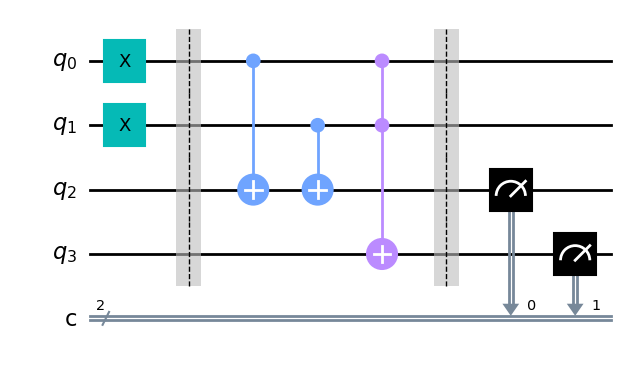

In [32]:
qc_ha = QuantumCircuit(4,2) # Cria um circuito quântico com 4 qubits e 2 bits clássicos
qc_ha.x(0) 
qc_ha.x(1) 
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.ccx(0, 1, 3)
qc_ha.barrier()
# extract outputsoutput="mpl"
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw(output="mpl")

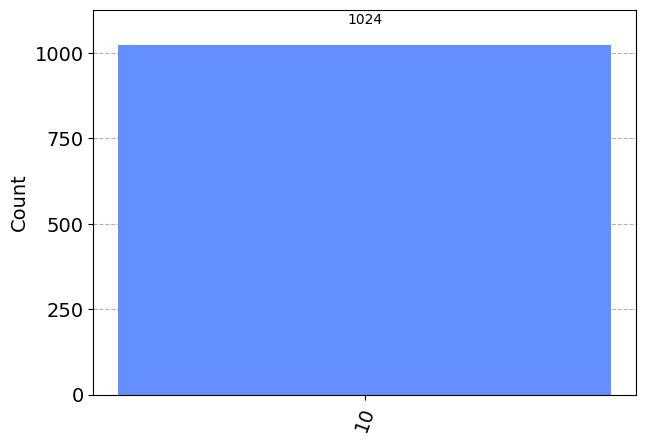

In [34]:
simulador = Aer.get_backend('aer_simulator') # Backend de simulação
qobj = assemble(qc_ha)
counts = simulador.run(qobj).result().get_counts()
plot_histogram(counts)

A partir de agora eu vou escrever um pouco menos, visto que o resto do capítulo é em sua grande parte composto por explicações teóricas. <br> Pelo tempo acho que não vai ser possível aplicar nesta atividade, mas eu vi pela internet que é possível escrever em LaTeX no jupyter, vou ver se aprendo e aplico nas próximas atividades <br><br>
Por enquanto vou fazer anotações em markdown 

### State vectors
Vetores de estado são muito parecidos com os dados comumente denominados como "y" em uma rede neural após aplicado o one-hot encoding. <br>
